In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [92]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [94]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [95]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Dropping Irrelevant Features

In [96]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [97]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [98]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding Categorical Data

In [99]:
df = pd.get_dummies(df,drop_first = True)

In [100]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Some insights about the target variable 

In [101]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

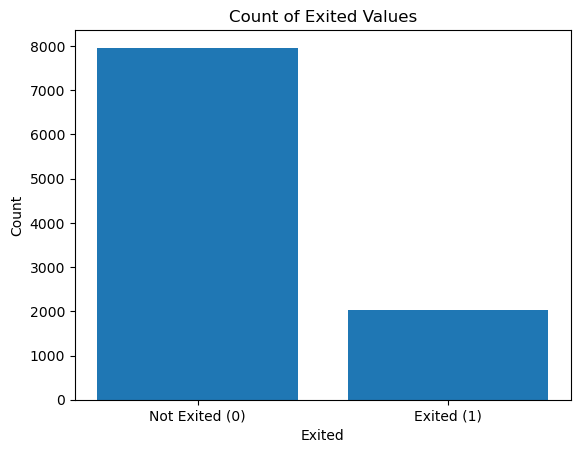

In [102]:
import matplotlib.pyplot as plt

# Value counts
value_counts = df['Exited'].value_counts()

# Creating a bar plot
plt.bar(value_counts.index, value_counts.values)

# Adding labels and title
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Count of Exited Values')

# Adding x-axis tick labels
plt.xticks(value_counts.index, ['Not Exited (0)', 'Exited (1)'])

# Show the plot
plt.show()


In [103]:
X = df.drop('Exited',axis=1)
y = df['Exited']

## Handling Imbalanced Data with SMOTE

In [104]:
from imblearn.over_sampling import SMOTE

In [105]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [106]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

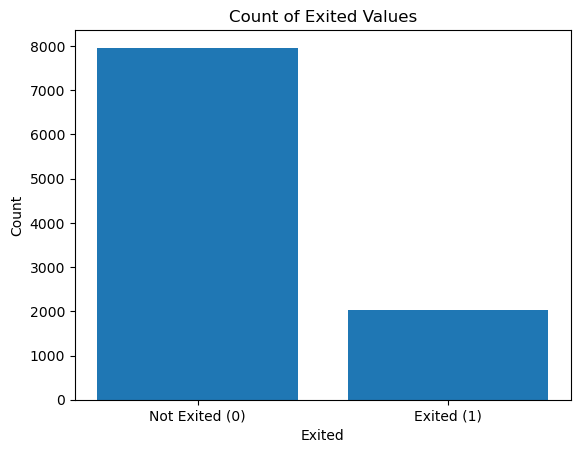

In [107]:
import matplotlib.pyplot as plt

# Value counts
value_counts = df['Exited'].value_counts()

# Creating a bar plot
plt.bar(value_counts.index, value_counts.values)

# Adding labels and title
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Count of Exited Values')

# Adding x-axis tick labels
plt.xticks(value_counts.index, ['Not Exited (0)', 'Exited (1)'])

# Show the plot
plt.show()


## Splitting The Dataset into Training Set and Test Set

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)

## Feature Scaling

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
sc = StandardScaler()

In [112]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [113]:
X_train

array([[ 0.77591473, -0.89883796,  0.79397013, ..., -0.57845511,
         2.15181389, -0.84188338],
       [-0.66083321, -0.79931228,  1.15944948, ..., -0.57845511,
        -0.4647242 ,  1.18781297],
       [-1.303016  ,  0.19594453,  0.79397013, ..., -0.57845511,
         2.15181389,  1.18781297],
       ...,
       [-0.26899286,  0.59404726,  0.79397013, ..., -0.57845511,
         2.15181389, -0.84188338],
       [ 0.49291893, -0.99836364, -1.39890599, ..., -0.57845511,
        -0.4647242 ,  1.18781297],
       [ 1.64667106,  2.18645815, -1.39890599, ..., -0.57845511,
        -0.4647242 , -0.84188338]])

## Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
log = LogisticRegression()

In [116]:
log.fit(X_train, y_train)

LogisticRegression()

In [117]:
y_pred1 = log.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
accuracy_score(y_test,y_pred1)

0.7735454164922562

In [120]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [121]:
precision_score(y_test, y_pred1)

0.7596193628465039

In [122]:
recall_score(y_test, y_pred1)

0.785622593068036

In [123]:
f1_score(y_test,y_pred1)

0.7724021876314682

## SVC

In [124]:
from sklearn import svm

In [125]:
svm = svm.SVC()

In [126]:
svm.fit(X_train,y_train)

SVC()

In [127]:
y_pred2=svm.predict(X_test)

In [128]:
accuracy_score(y_test, y_pred2)

0.8231477605692759

In [129]:
precision_score(y_test, y_pred2)

0.820446735395189

In [130]:
recall_score(y_test, y_pred2)

0.8172871202396235

In [131]:
f1_score(y_test,y_pred2)

0.8188638799571275

## KNeighbors Classifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
knn = KNeighborsClassifier()

In [134]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [135]:
y_pred3=knn.predict(X_test)

In [136]:
accuracy_score(y_test, y_pred3)

0.8020092088740058

In [137]:
precision_score(y_test, y_pred3)

0.779205138498595

In [138]:
recall_score(y_test, y_pred3)

0.8305519897304237

In [139]:
f1_score(y_test,y_pred3)

0.804059652029826

## Desicion Tree Classifier

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
dt = DecisionTreeClassifier()

In [142]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [143]:
y_pred4=dt.predict(X_test)

In [144]:
accuracy_score(y_test, y_pred4)

0.7879866052741733

In [145]:
precision_score(y_test, y_pred4)

0.7802709568162574

In [146]:
recall_score(y_test, y_pred4)

0.7886178861788617

In [147]:
f1_score(y_test,y_pred4)

0.7844222174930836

## Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rf = RandomForestClassifier()

In [150]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [151]:
y_pred5=rf.predict(X_test)

In [152]:
accuracy_score(y_test,y_pred5)

0.8455420678107995

In [153]:
precision_score(y_test, y_pred5)

0.8435754189944135

In [154]:
recall_score(y_test, y_pred5)

0.8399657680787335

In [155]:
f1_score(y_test,y_pred5)

0.8417667238421955

## Gradient Boosting Classifier

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

In [157]:
gbc = GradientBoostingClassifier()

In [158]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [159]:
y_pred6=gbc.predict(X_test)

In [160]:
accuracy_score(y_test,y_pred6)

0.8241942235244872

In [161]:
precision_score(y_test,y_pred6)

0.8252933507170795

In [162]:
recall_score(y_test,y_pred6)

0.8125802310654685

In [163]:
f1_score(y_test,y_pred6)

0.8188874514877102

## XGBoost

In [164]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [165]:
y_pred7=model_xgb.predict(X_test)

In [166]:
accuracy_score(y_test,y_pred7)

0.8495186270406028

In [167]:
precision_score(y_test,y_pred7)

0.8410623946037099

In [168]:
recall_score(y_test,y_pred6)

0.8125802310654685

In [169]:
f1_score(y_test,y_pred6)

0.8188874514877102

### Accuracy Summary

As we can see, XGBoost Classifier has highest accuracy

In [170]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
           precision_score(y_test,y_pred6),
            precision_score(y_test,y_pred6)
          ]
})

In [171]:
performance_summary

,Model,PRECISION
0,LR,0.759619
1,SVC,0.820447
2,KNN,0.779205
3,DT,0.780271
4,RF,0.843575
5,GBC,0.825293
6,XGB,0.825293


In [172]:
print(performance_summary.columns)



Index(['Model', 'PRECISION'], dtype='object')


<Axes: xlabel='Model', ylabel='PRECISION'>

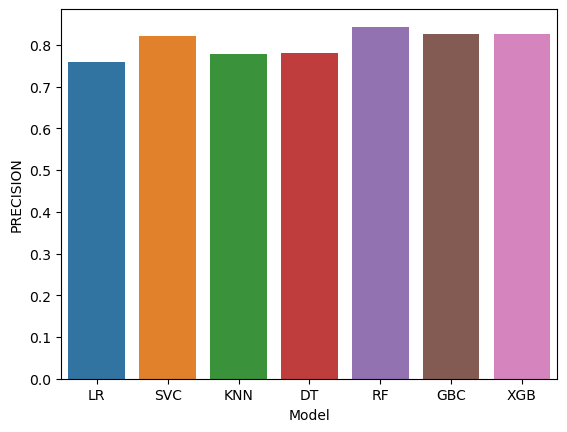

In [173]:
sns.barplot(x=performance_summary['Model'], y=performance_summary['PRECISION'])


## Saving the best model, XGBoost

In [174]:
X_res = sc.fit_transform(X_res)

In [175]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [176]:
import joblib

In [177]:
joblib.dump(model_xgb, 'churn_predict_model')

['churn_predict_model']

In [178]:
model = joblib.load('churn_predict_model')

In [180]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [181]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1])

In [182]:
model.predict([[629,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1])

In [183]:
model.predict([[1619,42,2,0.0,1,0,0,101348.88,0,0,0]])

array([1])

In [184]:
model.predict([[619,42,2,0.0,1,0,0,101348.88,0,1,0]])

array([0])

In [185]:
model.predict([[201,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1])

In [186]:
model.predict([[619,42,2,10000.0,0,0,0,101348.88,0,0,0]])

array([1])